Original Sampling Frequency: 48000
Original Bit Resolution: float32


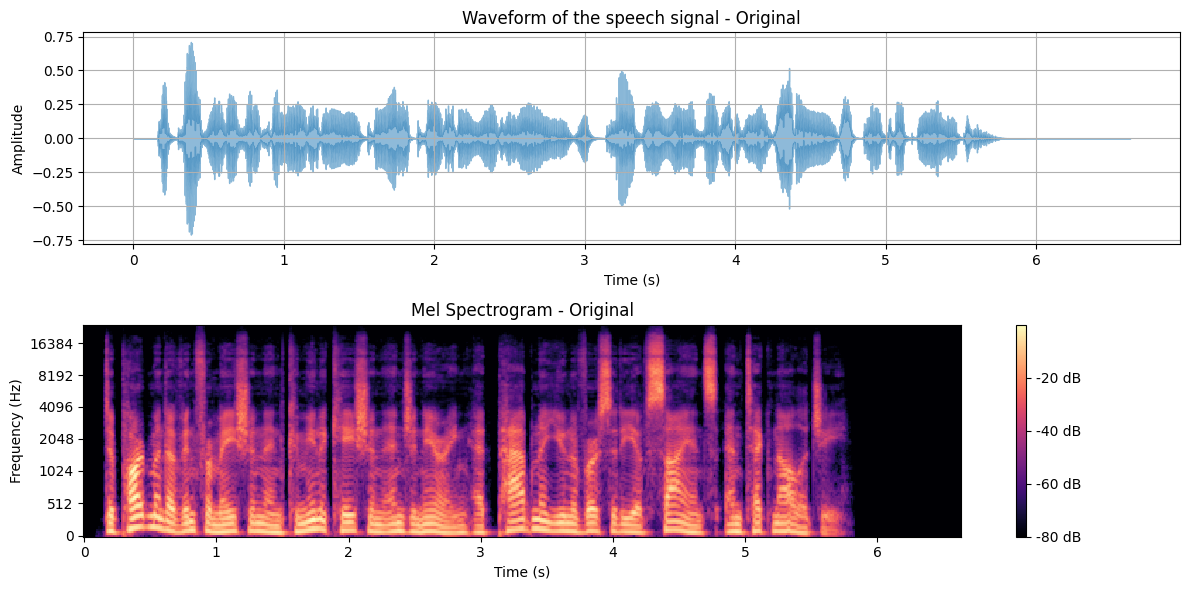

Resampled Sampling Frequency: 8500
Resampled Bit Resolution: float32


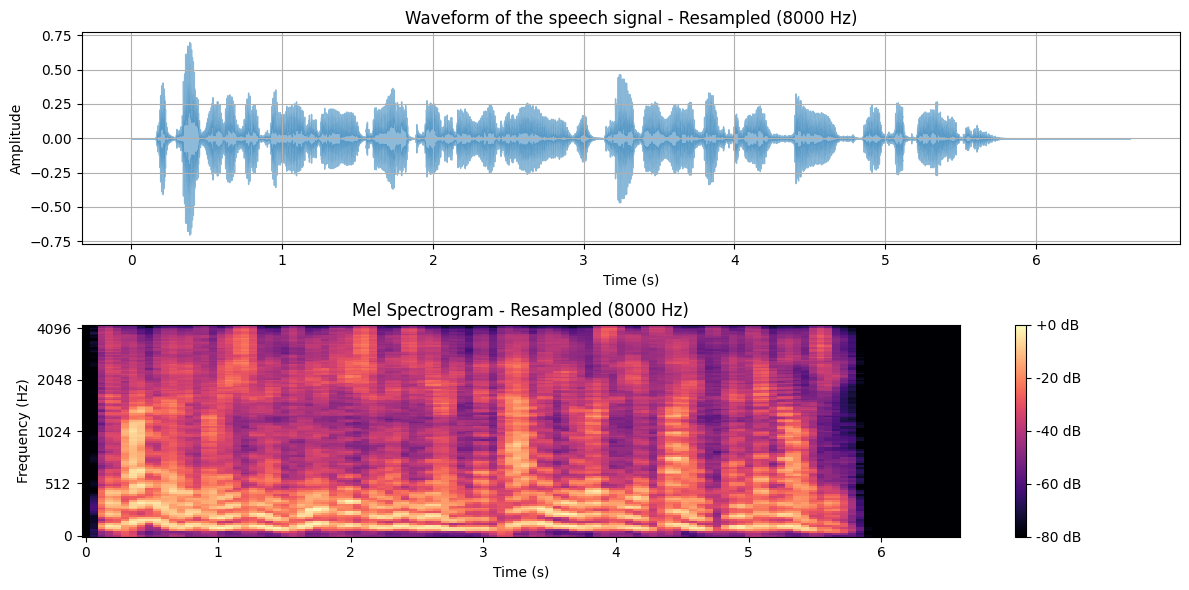

Resampled Sampling Frequency: 8500
Resampled Bit Resolution: int16


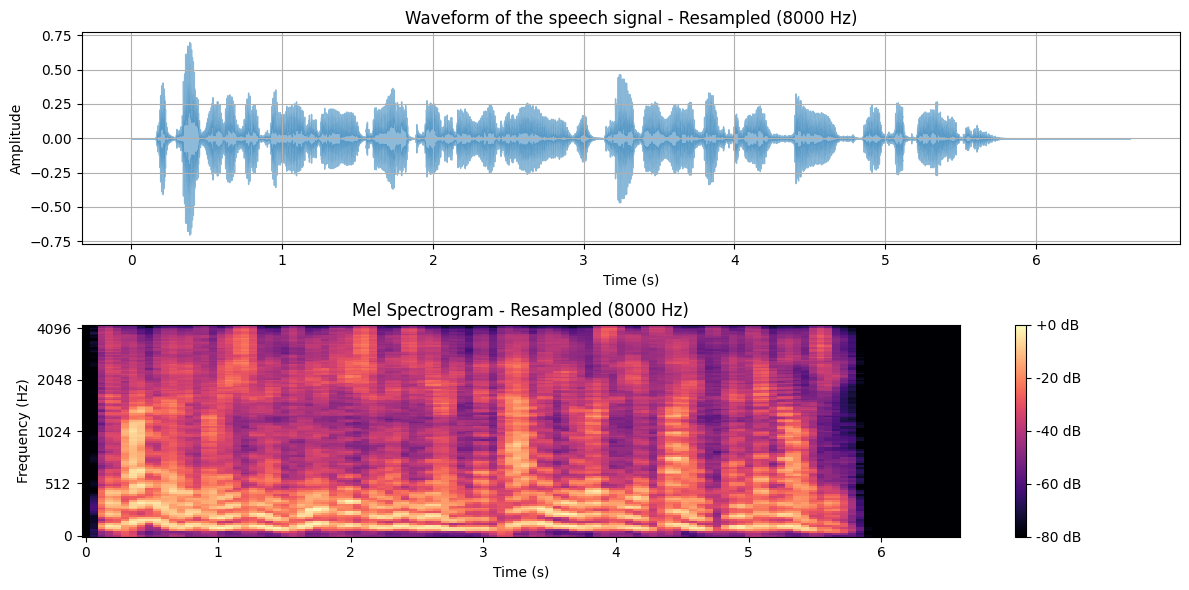

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio, display
# Example usage:
file_path = r"C:\Users\Win-10\OneDrive\Desktop\Lab_3.2\Department of Inform.wav"
def plot_waveform_and_spectrogram(signal, sr, title):
    # Plot the waveform
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(signal, sr=sr, alpha=0.5)
    plt.title('Waveform of the speech signal - ' + title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
# Plot the spectrogram
    plt.subplot(2, 1, 2)
    spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram - ' + title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()
# Load the audio file with Librosa
signal, sr = librosa.load(file_path, sr=None)
# Identify sampling frequency and bit resolution
print('Original Sampling Frequency:', sr)
print('Original Bit Resolution:', signal.dtype)
# Plot waveform and spectrogram of the original signal
plot_waveform_and_spectrogram(signal, sr, 'Original')
# Play the original signal
display(Audio(signal, rate=sr))
# Set sampling frequency to 8000 Hz
sr_8000 = 8500
signal_resampled = librosa.resample(signal, orig_sr=sr, target_sr=sr_8000)
# Identify sampling frequency and bit resolution of the resampled signal
print('Resampled Sampling Frequency:', sr_8000)
print('Resampled Bit Resolution:', signal_resampled.dtype)
# Save the resampled signal
wavfile.write('speech_signal_8000Hz.wav', sr_8000, (signal_resampled * 32767).astype(np.int16))
# Plot waveform and spectrogram of the resampled signal
plot_waveform_and_spectrogram(signal_resampled, sr_8000, 'Resampled (8000 Hz)')
# Play the resampled signal
display(Audio(signal_resampled, rate=sr_8000))
# Reduce bit resolution to 16 bits
signal_resampled_16bit = (signal_resampled * 32767).astype(np.int16)
# Identify sampling frequency and bit resolution of the resampled signal
print('Resampled Sampling Frequency:', sr_8000)
print('Resampled Bit Resolution:', signal_resampled_16bit.dtype)
# Save the resampled signal with reduced bit resolution
wavfile.write('speech_signal_8000Hz_16bit.wav', sr_8000, signal_resampled_16bit)
# Plot waveform and spectrogram of the resampled signal
plot_waveform_and_spectrogram(signal_resampled, sr_8000, 'Resampled (8000 Hz)')
# Play the resampled signal
display(Audio(signal_resampled, rate=sr_8000))